# Importing necessary libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats

%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset

In [25]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [27]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
data['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

# Eploratory data Analysis(EDA)

In [29]:
data.shape

(18249, 13)

In [30]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [31]:
data['Date']=pd.to_datetime(data['Date'])

In [32]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [33]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date',axis=1,inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [35]:
data.nunique().sort_values()

type                2
year                4
Month              12
Day                31
region             54
AveragePrice      259
XLarge Bags      5588
4770            12071
Large Bags      15082
Small Bags      17321
4046            17702
Total Bags      18097
4225            18103
Total Volume    18237
dtype: int64

In [36]:
data.isnull().sum().sum()

0

In [37]:
data.drop_duplicates(inplace=True)
data.shape

(18249, 14)

In [38]:
data['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


# Data Visualtization

In [40]:
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [41]:
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


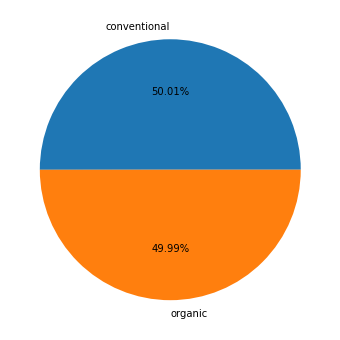

<AxesSubplot:xlabel='type', ylabel='Count'>

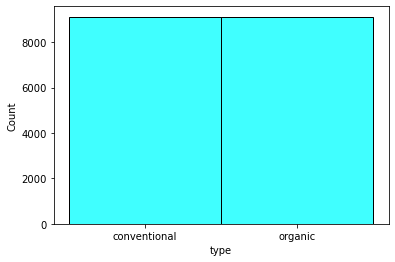

In [42]:
print(data['type'].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data['type'].value_counts(), labels=labels, autopct='%1.2f%%')

plt.show()
sns.histplot(data = data, x = 'type', stat = 'count', color = 'cyan', legend = True)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


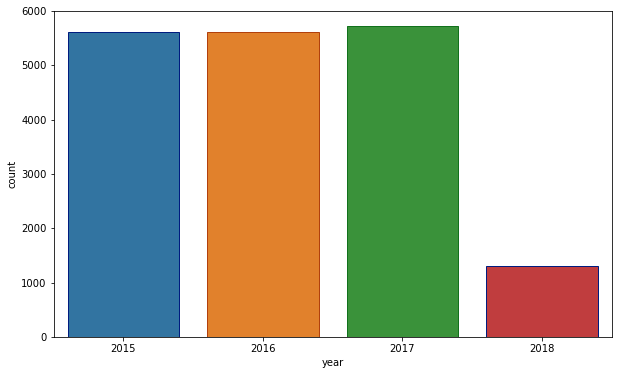

In [43]:
print(data['year'].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(data['year'],edgecolor=sns.color_palette('dark',3))
plt.show()

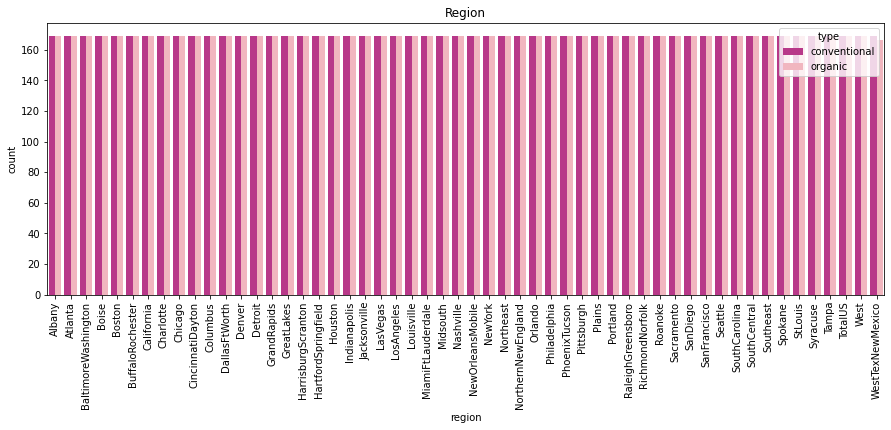

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data['region'],palette='RdPu_r',hue=data['type'])
plt.title('Region')
plt.xticks(rotation=90)
plt.show()

# The relation between each other by ploting pair pot:

<Figure size 1800x1800 with 0 Axes>

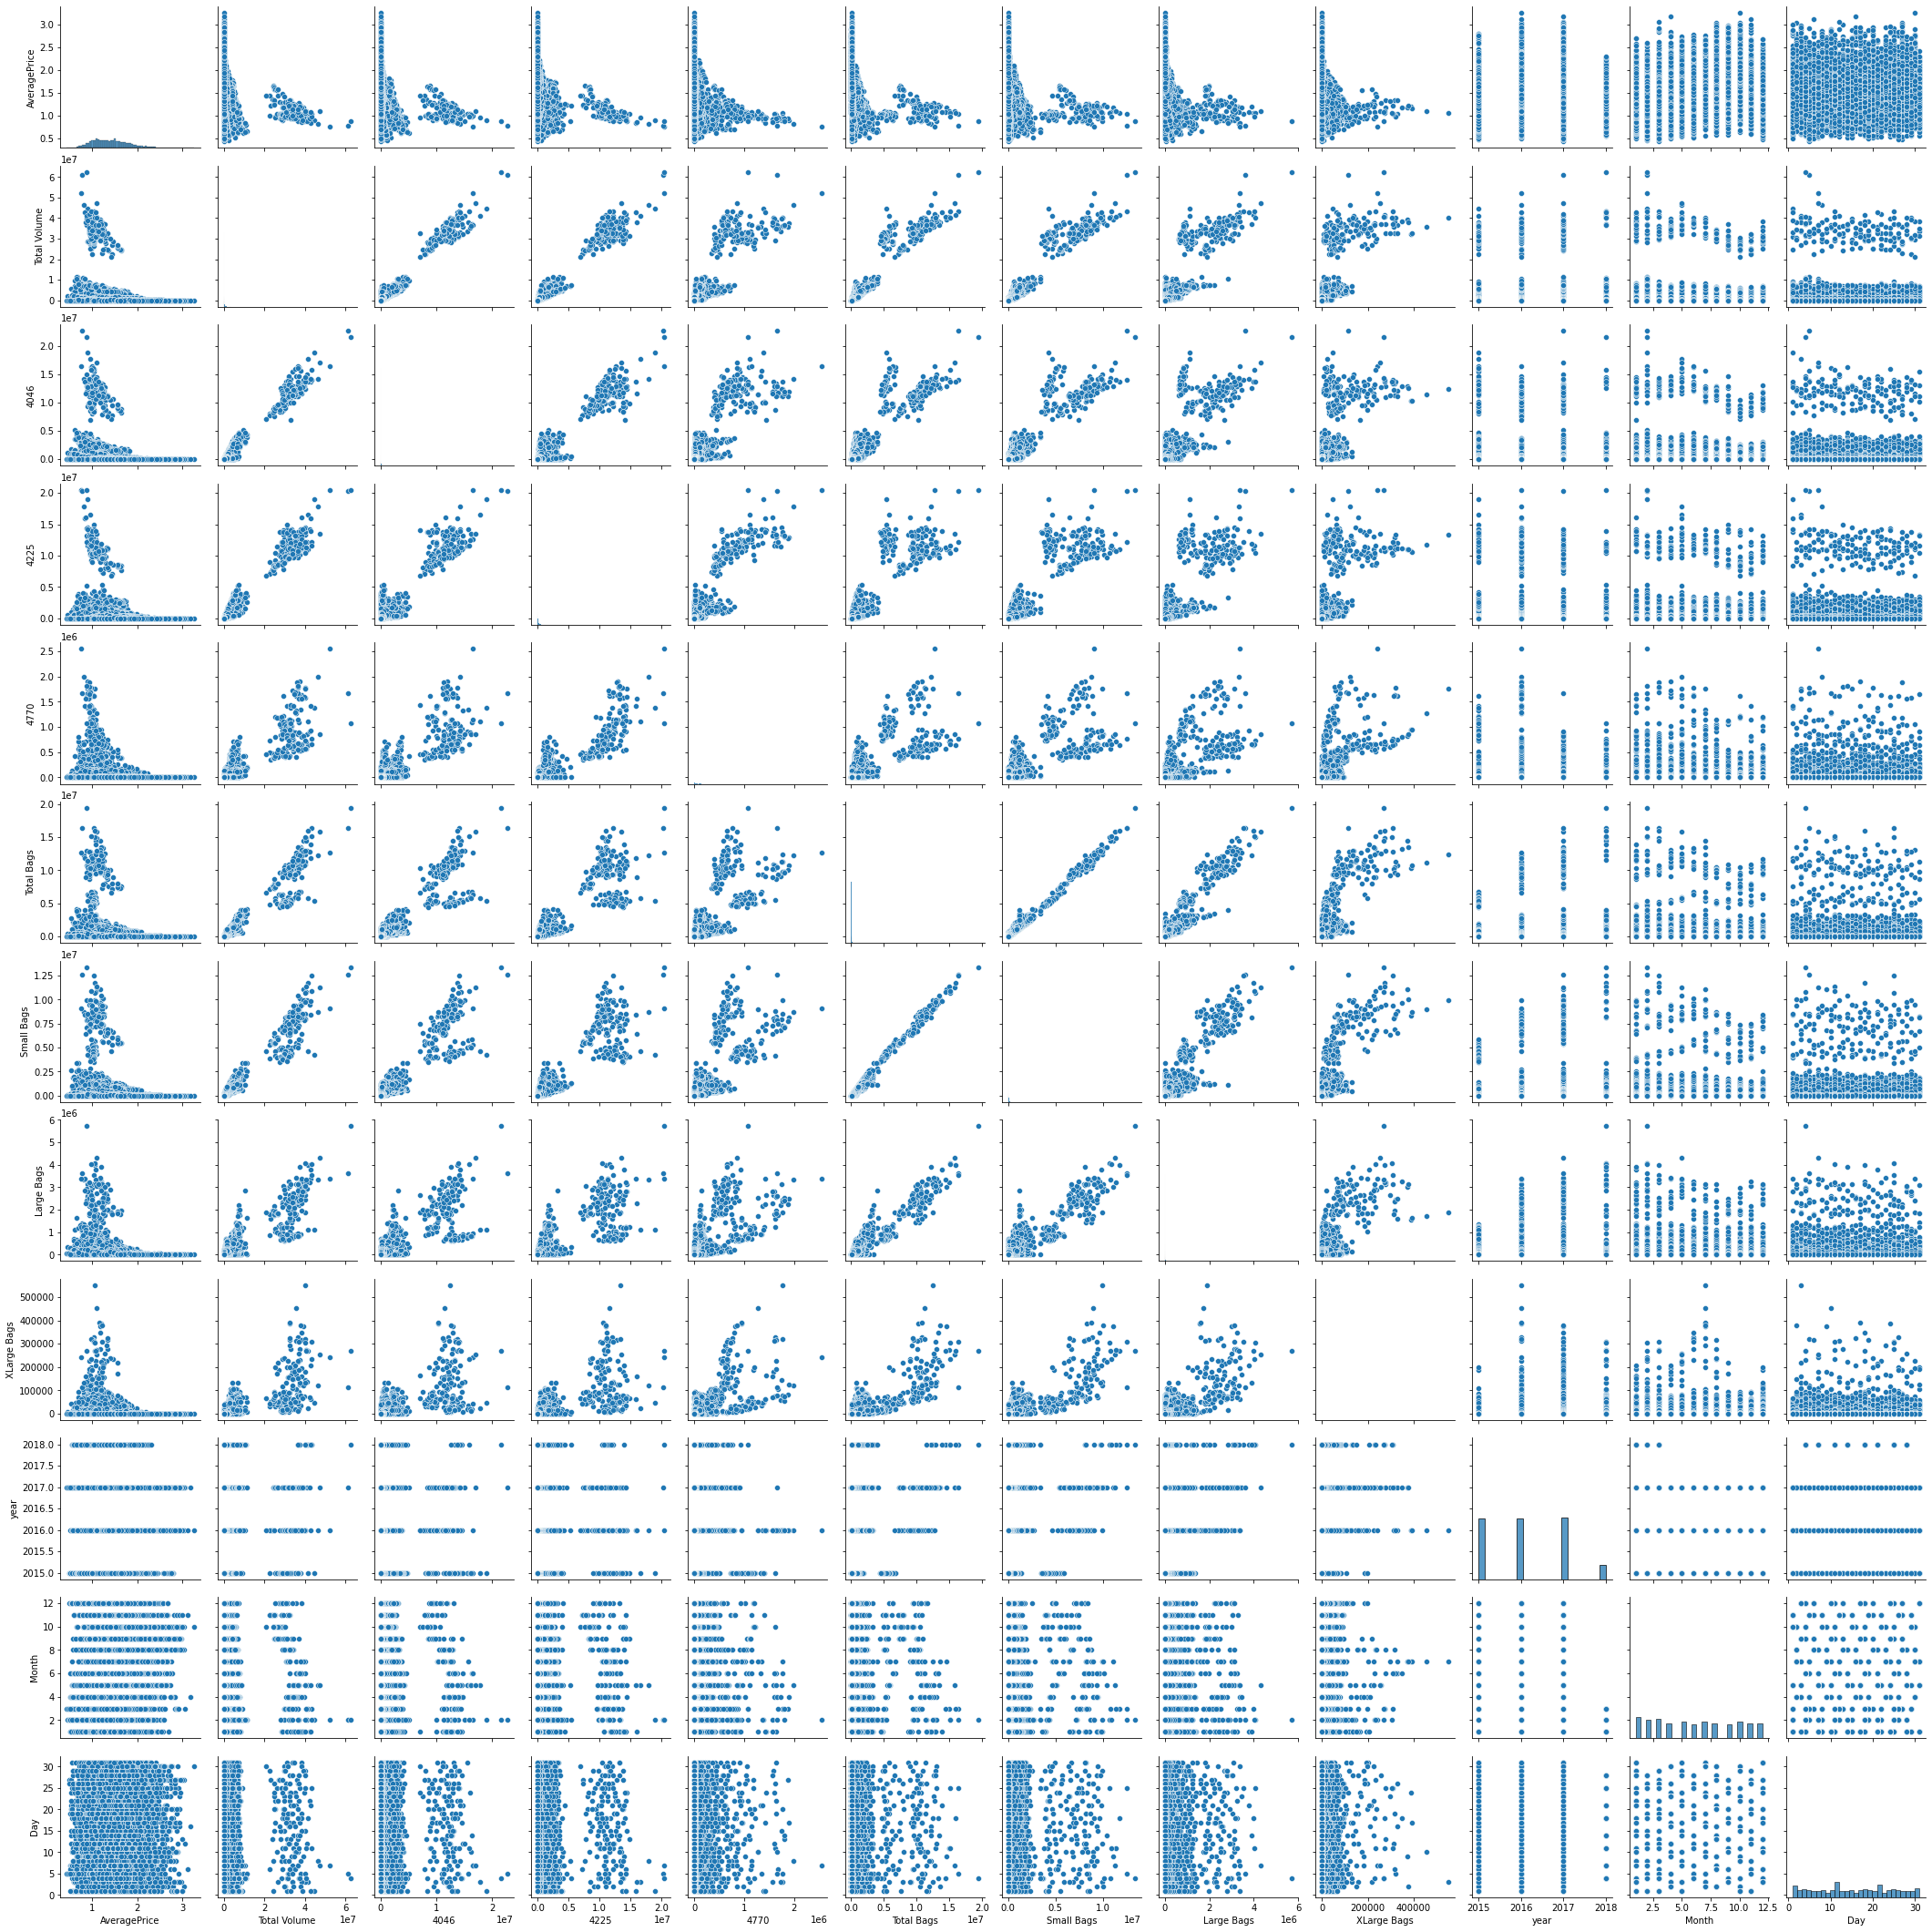

In [45]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

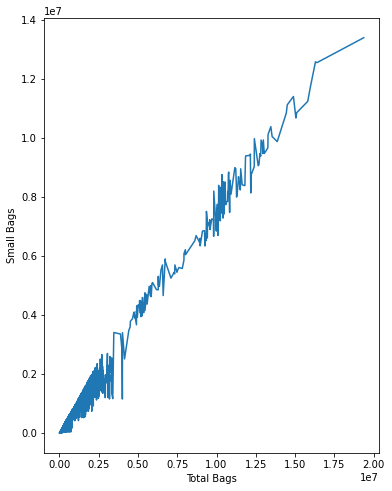

In [46]:
plt.figure(figsize=(6,8))
sns.lineplot('Total Bags','Small Bags', data = data)
plt.show()

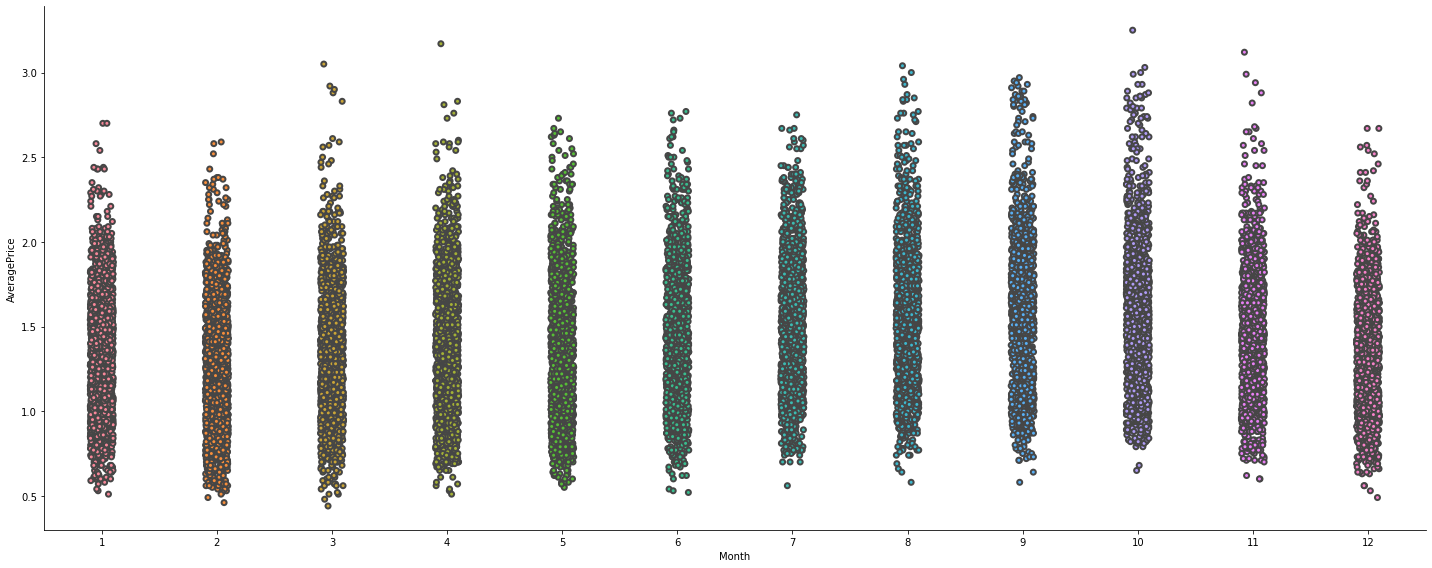

In [47]:
sns.catplot(x = 'Month', y = 'AveragePrice', kind='strip', data=data,height=8, linewidth=2, aspect=2.5)

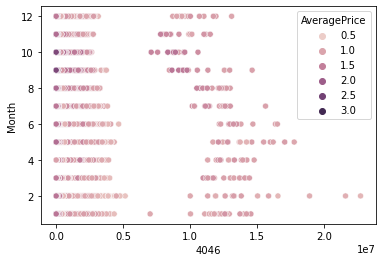

In [48]:
sns.scatterplot(x='4046', y = 'Month', hue='AveragePrice', data=data)
plt.show()

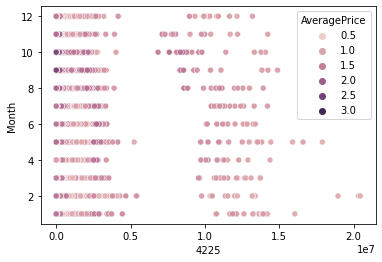

In [49]:
sns.scatterplot(x = '4225', y = 'Month',hue='AveragePrice',data=data)
plt.show()

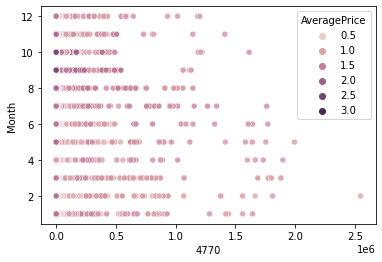

In [50]:
sns.scatterplot(x='4770', y ='Month',hue='AveragePrice',data=data)
plt.show()

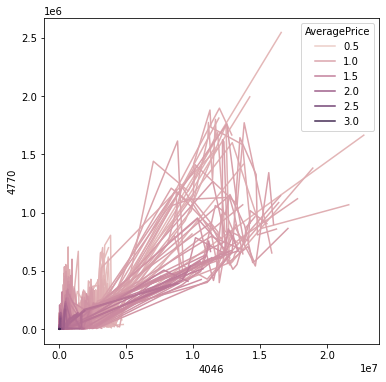

In [51]:
plt.figure(figsize=(6,6))
sns.lineplot('4046','4770',data=data,hue='AveragePrice')
plt.show()

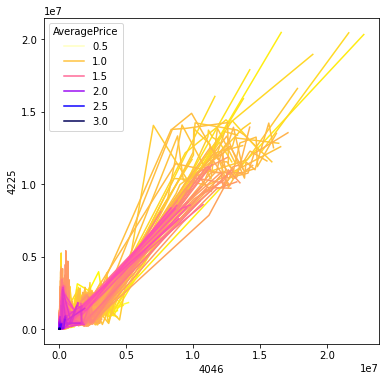

In [52]:
plt.figure(figsize=(6,6))
sns.lineplot('4046','4225',data=data,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

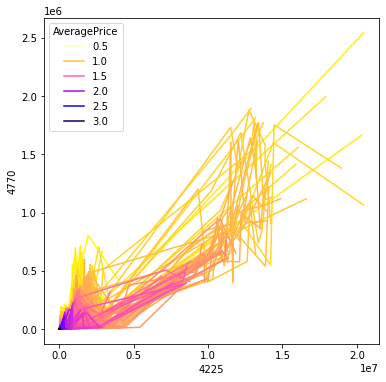

In [53]:
plt.figure(figsize=(6,6))
sns.lineplot('4225','4770',data=data,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

# Relationship between year and Total Volume:

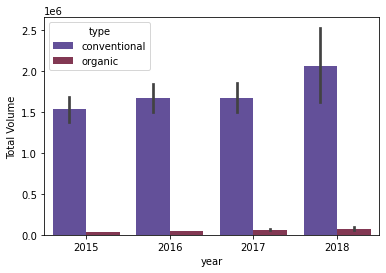

In [54]:
plt.figure(figsize=(6,4))
sns.barplot(x='year', y='Total Volume', hue='type',data=data,palette='twilight')
plt.show()

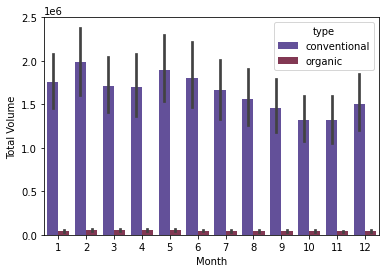

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month', y='Total Volume', hue='type',data=data,palette='twilight')
plt.show()

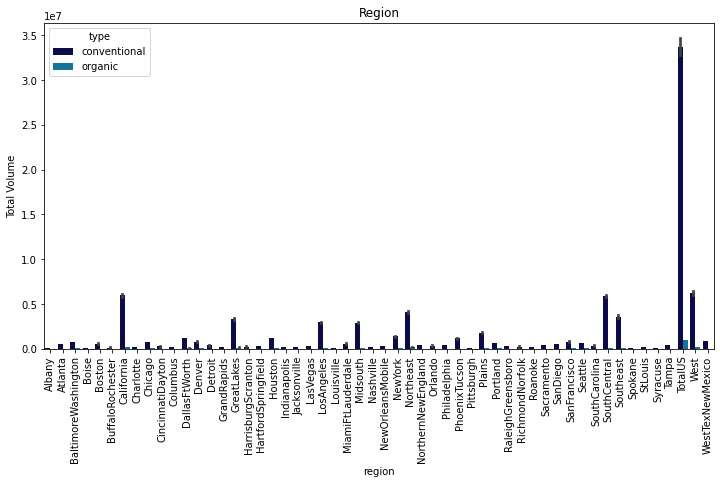

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(data['region'],data['Total Volume'],palette='ocean',hue=data['type'])
plt.title('Region')
plt.xticks(rotation=90)
plt.show()

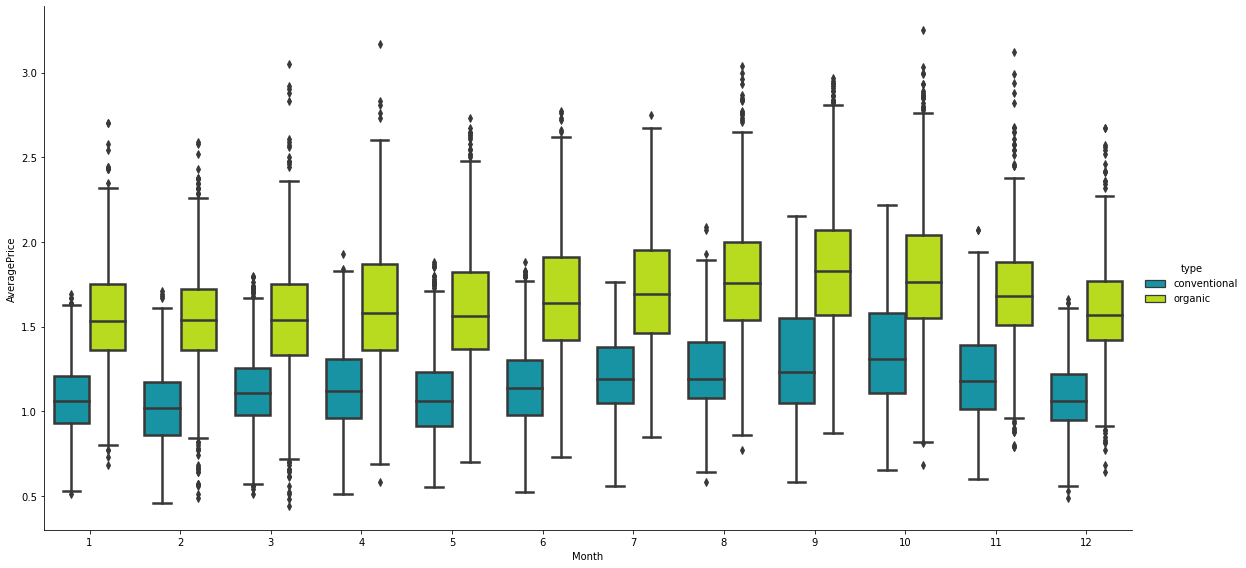

In [57]:
sns.catplot(x='Month', y='AveragePrice', hue='type',
            kind='box', data=data, height=8, linewidth=2.5, aspect=2,palette='nipy_spectral');

# Relationship between Total volume and Average Price:

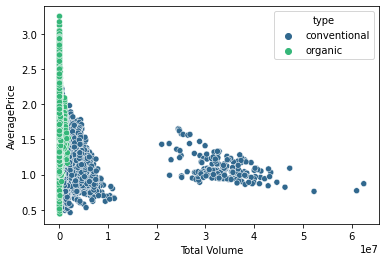

In [58]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=data,palette='viridis')
plt.show()

# Comparison between PLU sold vs day:

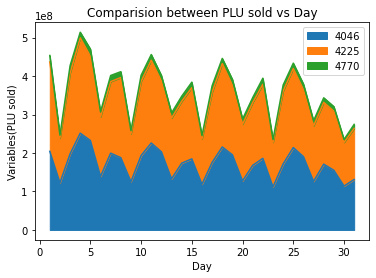

In [59]:
variables = data[['4046', '4225', '4770']].groupby(data.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title('Comparision between PLU sold vs Day')
plt.xlabel('Day')
plt.ylabel('Variables(PLU sold)')
plt.show()

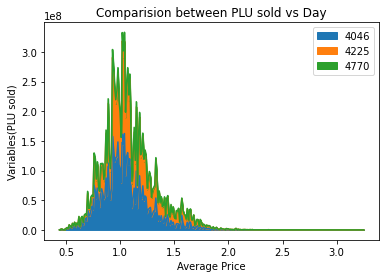

In [60]:
variables = data[['4046', '4225', '4770']].groupby(data.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title('Comparision between PLU sold vs Day')
plt.xlabel('Average Price')
plt.ylabel('Variables(PLU sold)')
plt.show()

# Comparison between the Total Bags and Total Volume:

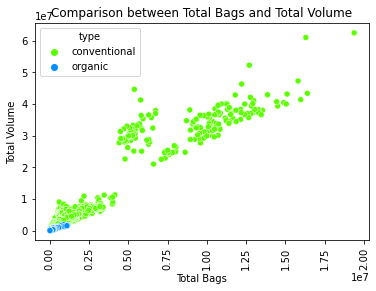

In [61]:
plt.figure(figsize=(6,4))
plt.title('Comparison between Total Bags and Total Volume')
sns.scatterplot(x='Total Bags', y='Total Volume', hue='type',data=data,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.show()

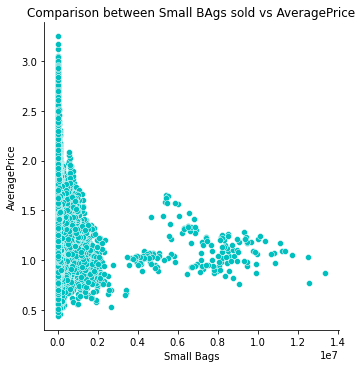

In [62]:
sns.relplot(data['Small Bags'],data['AveragePrice'],color='c');
plt.title('Comparison between Small BAgs sold vs AveragePrice')
plt.xlabel('Small Bags')
plt.ylabel('AveragePrice')
plt.show()

# checking for outliers:

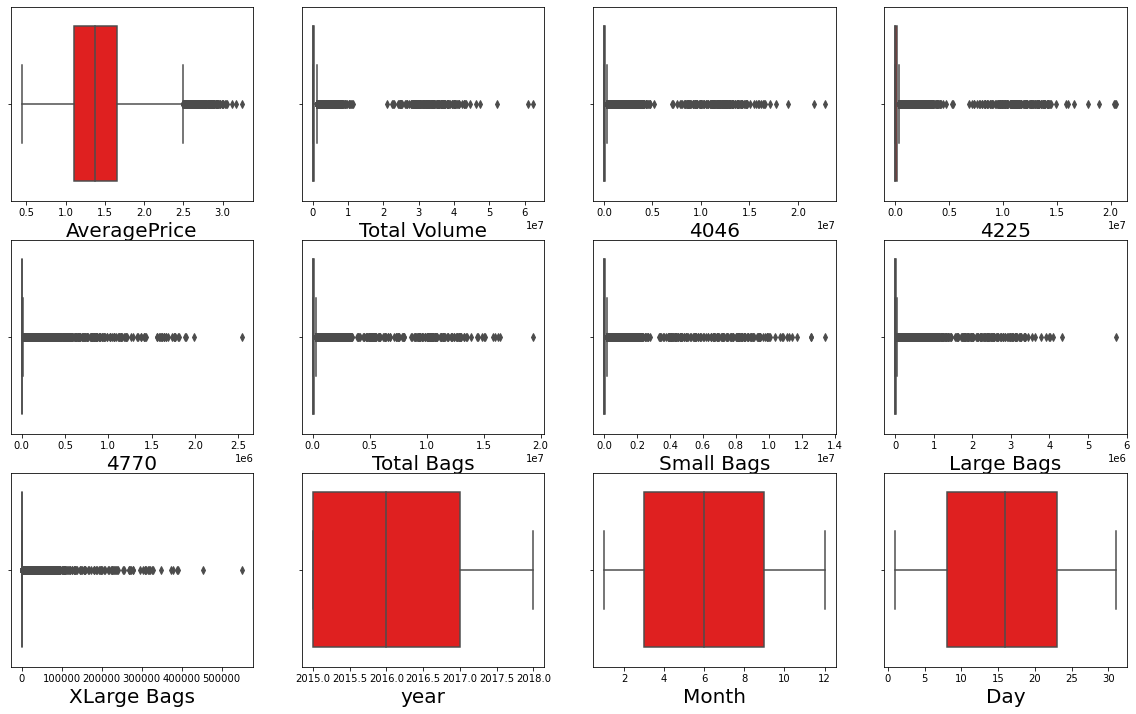

In [63]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Zscore method

In [64]:
feature_cols = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
from scipy.stats import zscore
z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [65]:
new_df = data[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [66]:
data.shape

(18249, 14)

In [67]:
new_df.shape

(17782, 14)

In [68]:
(18249-17782)/18249*100

2.55904433119623

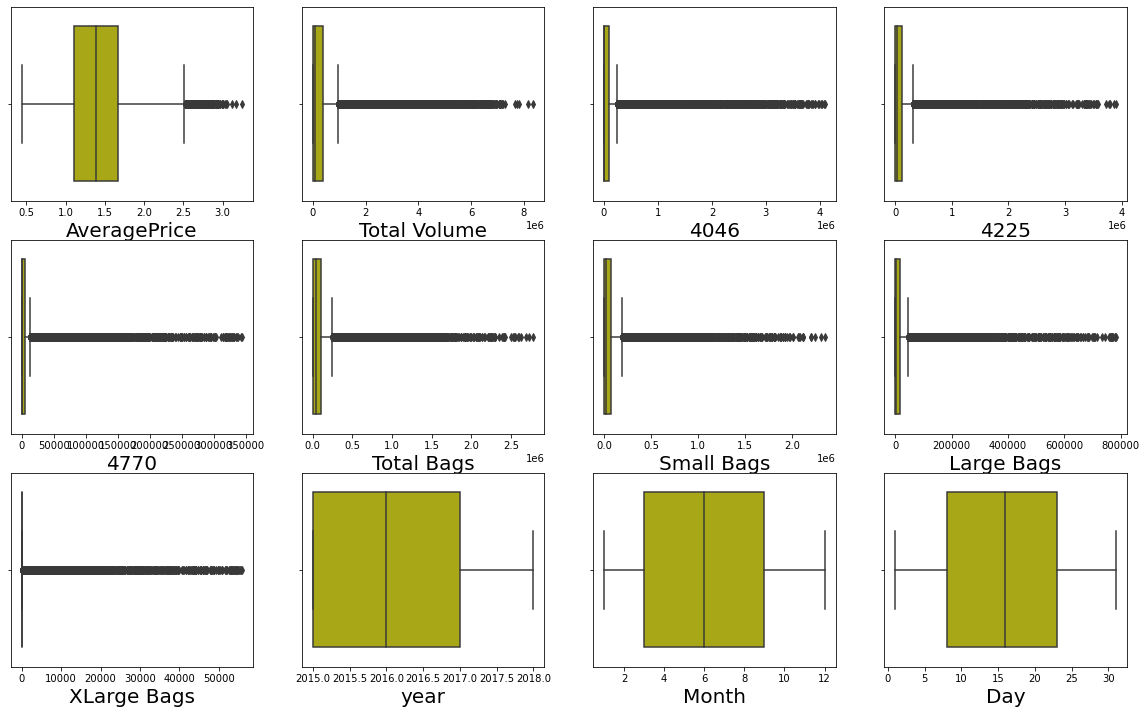

In [69]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# checking and removing Skewness:

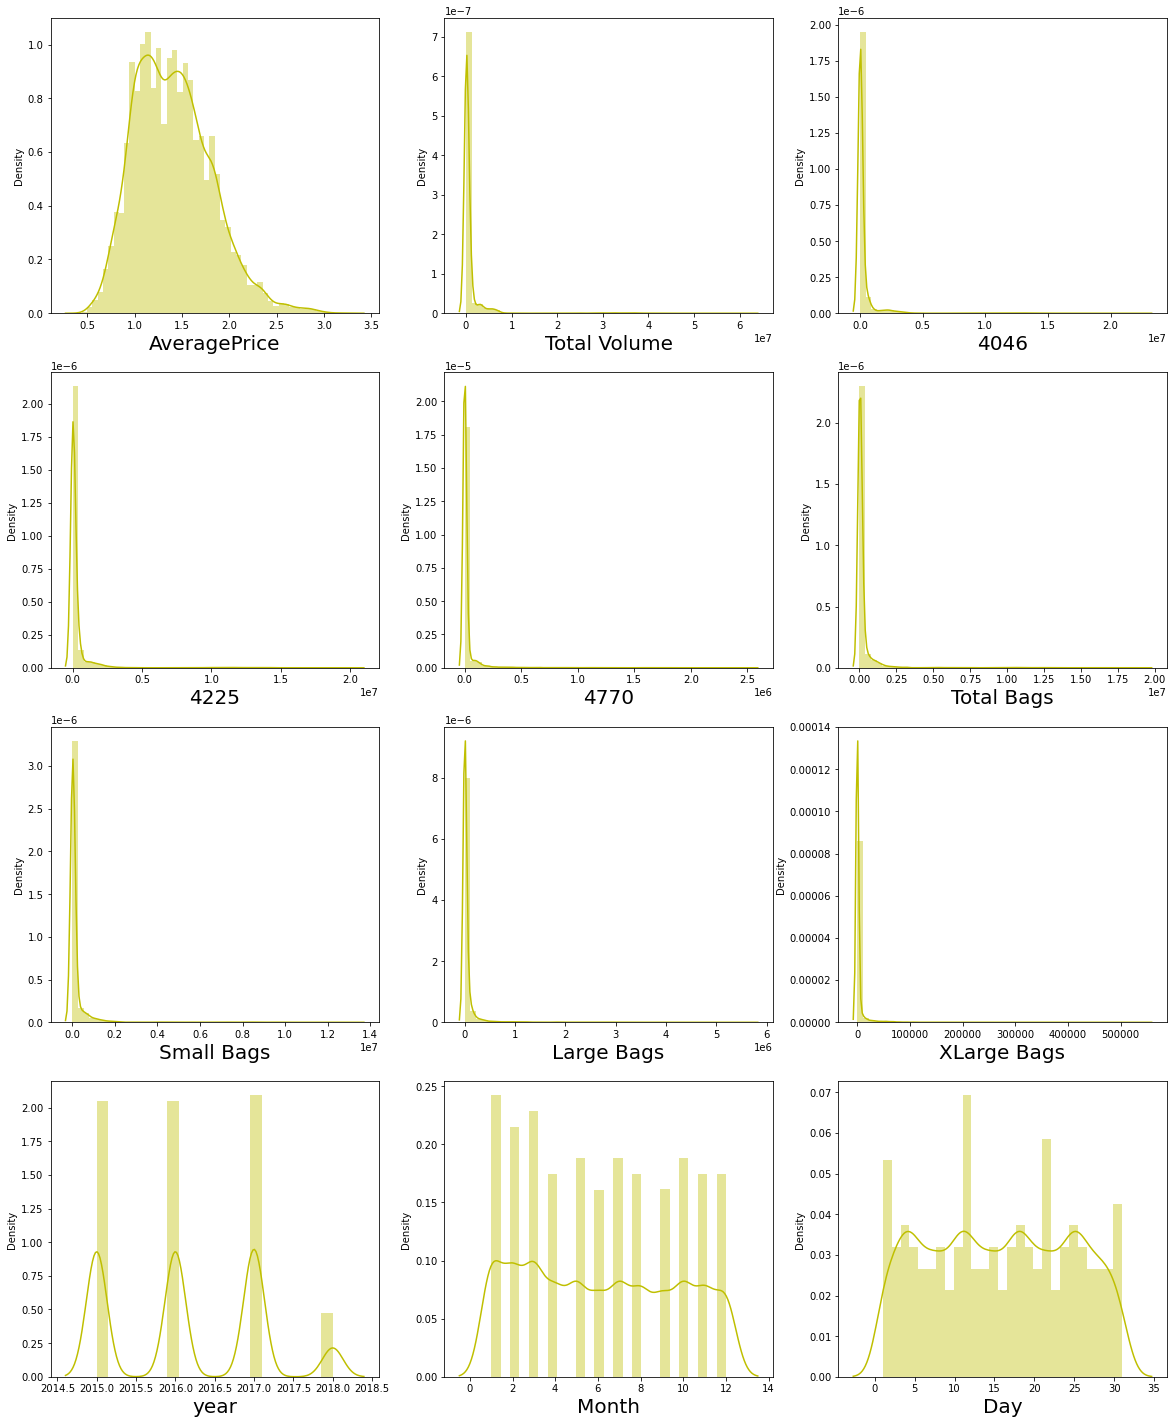

In [70]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [71]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [72]:
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [73]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

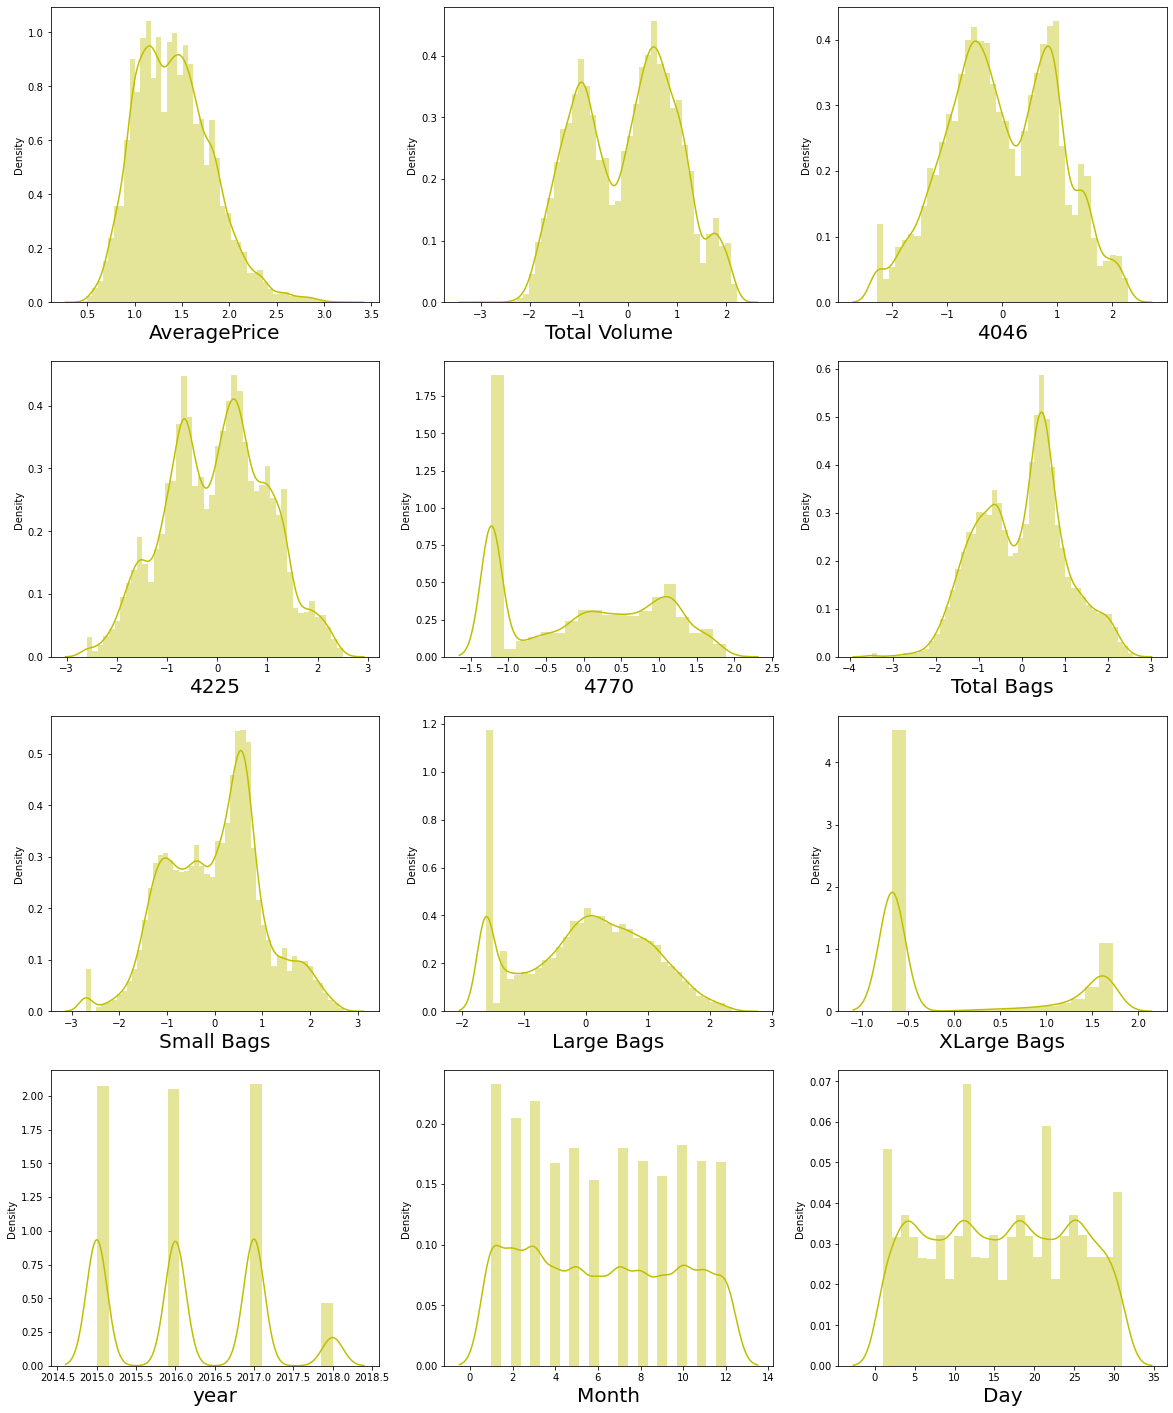

In [74]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [75]:
new_df['XLarge bags'] = np.log1p(new_df['XLarge Bags'])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
XLarge bags     0.791499
dtype: float64

In [76]:
f1=['XLarge bags']
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
XLarge bags     0.765164
dtype: float64

# Encoding:

In [77]:
categorical_col = ['type','region']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation using HEAT map:

In [78]:
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,XLarge bags
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.387285,0.608447,0.099910,0.010428,0.157900,0.024742,-0.393528
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629592,-0.800828,0.076584,0.065709,-0.026332,-0.006248,0.627310
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573880,-0.725826,-0.002396,0.159390,-0.025919,-0.004558,0.573589
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.584508,-0.747722,-0.004533,0.032273,-0.024708,-0.005919,0.580290
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.616413,-0.780988,-0.051657,0.037805,-0.017377,0.001383,0.615107
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.613698,-0.725686,0.210924,0.065996,-0.014571,-0.003703,0.609370
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.603334,-0.720466,0.185955,0.051985,-0.010260,-0.000535,0.597809
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.452650,-0.500026,0.190295,0.086573,-0.016942,-0.000876,0.449473
XLarge Bags,-0.387285,0.629592,0.573880,0.584508,0.616413,0.613698,0.603334,0.452650,1.000000,-0.665587,0.159574,-0.020865,0.018751,0.010241,0.987033
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.665587,1.000000,0.007399,0.021970,-0.005044,-0.002469,-0.673864


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day'),
  Text(0, 14.5, 'XLarge bags')])

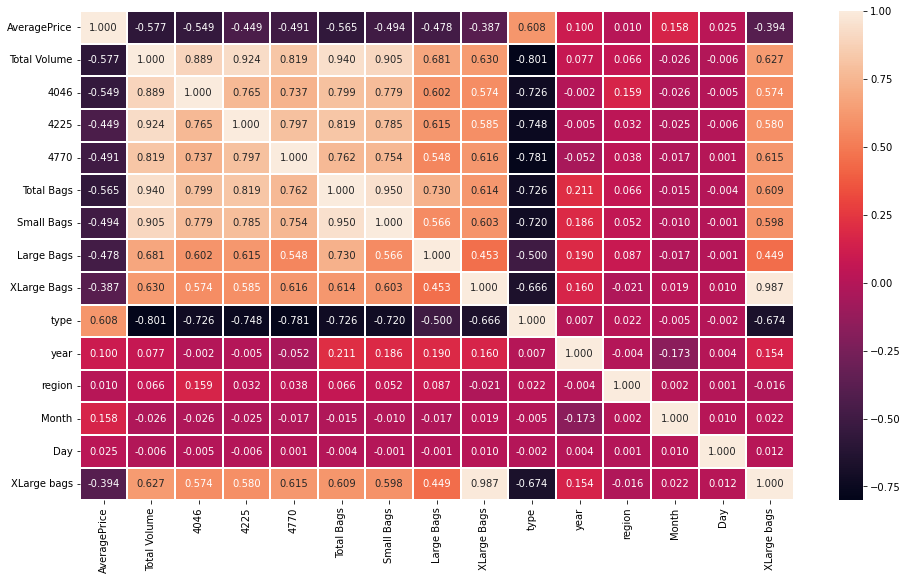

In [79]:
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [80]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.387285
XLarge bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

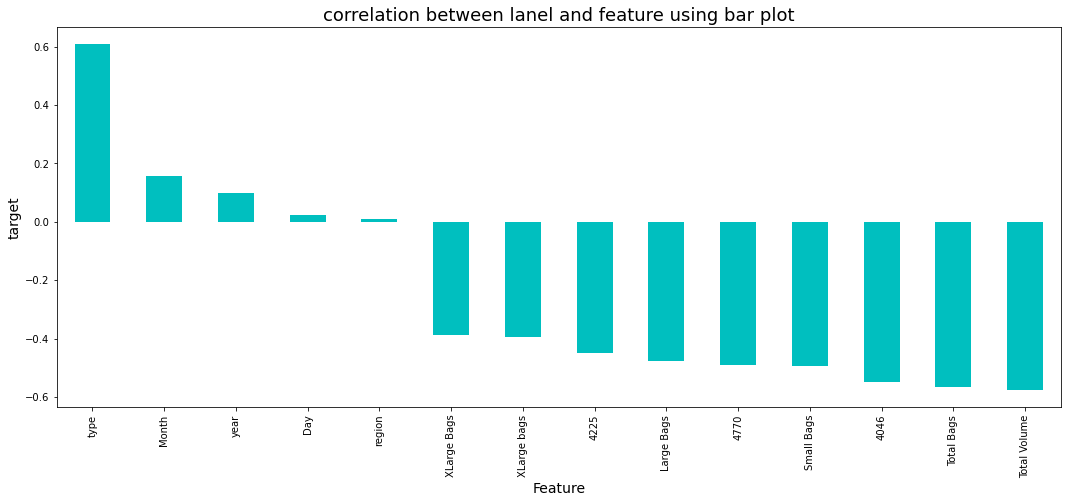

In [81]:
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('target', fontsize=14)
plt.title('correlation between lanel and feature using bar plot', fontsize=18)
plt.show()

In [82]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,XLarge bags
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0,12,27,-0.689355
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0,12,20,-0.689355
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0,12,13,-0.689355
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0,12,6,-0.689355
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0,11,29,-0.689355


In [83]:
class_df=new_df
class_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,XLarge bags
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0,12,27,-0.689355
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0,12,20,-0.689355
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0,12,13,-0.689355
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0,12,6,-0.689355
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0,11,29,-0.689355


In [84]:
new_df.drop('region',axis=1, inplace=True)
new_df.drop('XLarge bags',axis=1, inplace=True)

In [85]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,1,2018,2,4
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,1,2018,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,1,2018,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,1,2018,1,14


# Separating the features and label variables into x and y:

In [86]:
x = new_df.drop('AveragePrice', axis =1)
y = new_df['AveragePrice']

# Standard Scalarization Method


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,-1.026443,-1.214908,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,-1.026443,-1.214908,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,-1.026443,-1.214908,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,-1.026443,-1.214908,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,-1.026443,-1.214908,1.358706,1.517088
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,0.974238,1.979143,-1.185845,-1.331072
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,0.974238,1.979143,-1.468572,1.403161
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,0.974238,1.979143,-1.468572,0.605677
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,0.974238,1.979143,-1.468572,-0.191808


# Checking VIF values for multicollinearity:

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,51.836072,Total Volume
1,6.809789,4046
2,11.169550,4225
3,3.953768,4770
4,34.439698,Total Bags
5,16.639038,Small Bags
6,3.463038,Large Bags
7,2.046400,XLarge Bags
8,3.681757,type
9,1.386817,year


In [90]:
x.drop("Total Bags",axis=1, inplace=True)

In [91]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,36.855243,Total Volume
1,6.078856,4046
2,9.979052,4225
3,3.950951,4770
4,7.690869,Small Bags
5,2.110224,Large Bags
6,2.044568,XLarge Bags
7,3.637555,type
8,1.361458,year
9,1.051556,Month


# Building a model:

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(200,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.796304191563936  on Random_state  373


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [94]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# RANDOM FOREST REGRESSOR

In [95]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))
print('MAE:',mean_absolute_error(y_test, pred_RFR))
print('MSE:',mean_squared_error(y_test, pred_RFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())
print ("The difference between R2 score and CV is", (r2_score(y_test,pred_RFR)-(cross_val_score(RFR,x,y,cv=5).mean())))

R2_Score: 0.8699906874537077
MAE: 0.1017074414245548
MSE: 0.020937428041237105
RMSE: 0.14469771263305134
Cross_Validaton_Score 0.19688651817898303
The difference between R2 score and CV is 0.6633251976050027


# Support Vector Machine Regressor

In [96]:
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7758616083046257
MAE: 0.1402683863356437
MSE: 0.03609650228501535
RMSE: 0.18999079526391627
Cross_Validaton_Score 0.20886468964171412


# Linear Regression

In [97]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5585425350941986
MAE: 0.20621536924213296
MSE: 0.07109478331747218
RMSE: 0.26663605029603965
Cross_Validaton_Score 0.20014359203682383


# Gradient Descent Regressor:

In [98]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5546669415036614
MAE: 0.20797471877158322
MSE: 0.07171893062145904
RMSE: 0.2678039032976537
Cross_Validaton_Score 0.1824015723551907


# KNN Regressor

In [99]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.796304191563936
MAE: 0.13297244611059042
MSE: 0.03280431415182755
RMSE: 0.18111961283038222
Cross_Validaton_Score 0.13028083708426633


# GradientBoosting Regressor:

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7236784344635286
MAE: 0.15952375440869754
MSE: 0.04450037294522134
RMSE: 0.2109511150603887
Cross_Validaton_Score 0.3439209865662246


# Hyperparameter Tuning:

In [101]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [102]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [103]:
GCV.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 6,
 'weights': 'distance'}

In [104]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.14469771263305134
R2_Score: 79.90114898082876


# Saving the model

In [105]:
import joblib
joblib.dump(avocado_model,"Avocado_project.pkl")

['Avocado_project.pkl']

# Predicting the saved model:

In [106]:
model=joblib.load("Avocado_project.pkl")

prediction = model.predict(x_test)
prediction

array([1.47661108, 1.16980771, 1.95491445, ..., 1.04238993, 1.2590951 ,
       1.76930987])

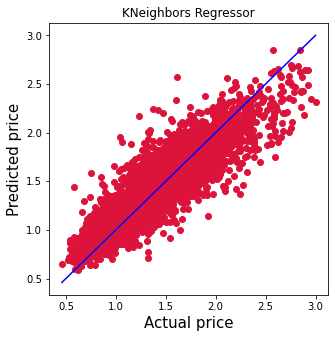

In [107]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [108]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

,Original,Predicted
0,1.35,1.476611
1,1.21,1.169808
2,2.24,1.954914
3,0.95,0.974130
4,1.03,1.137884
...,...,...
5330,0.95,1.170575
5331,1.04,1.099149
5332,0.97,1.042390
5333,1.08,1.259095


# Classification Problem- Finding the Region from these data

In [109]:
data= pd.read_csv("https://raw.githubusercontent.com/AvichalV/Avocado_Project/main/avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [110]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [111]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [112]:
data.shape

(18249, 14)

In [113]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [114]:
class_df = data

# Encoding the categorical columns using Label Encoding

In [115]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# correlation

In [116]:
class_df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


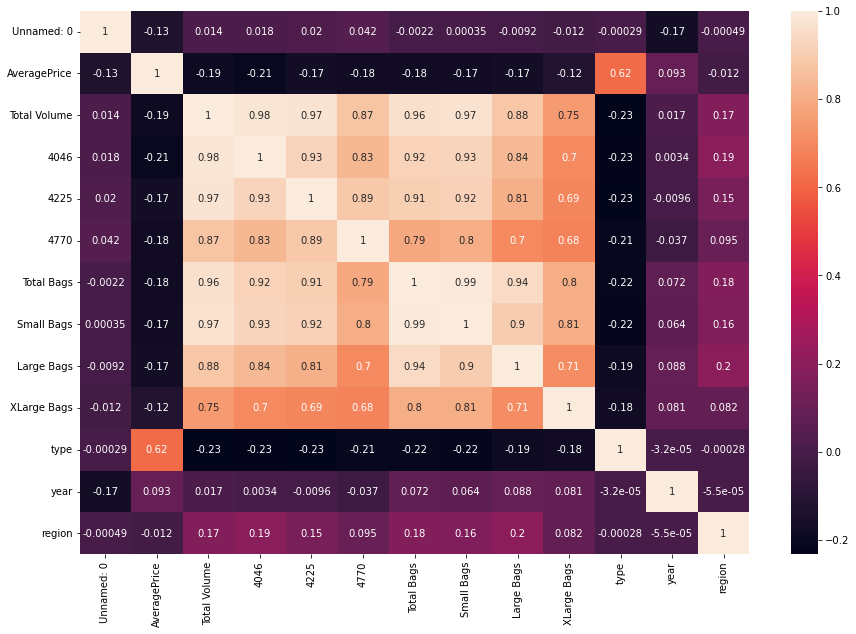

In [117]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [118]:
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

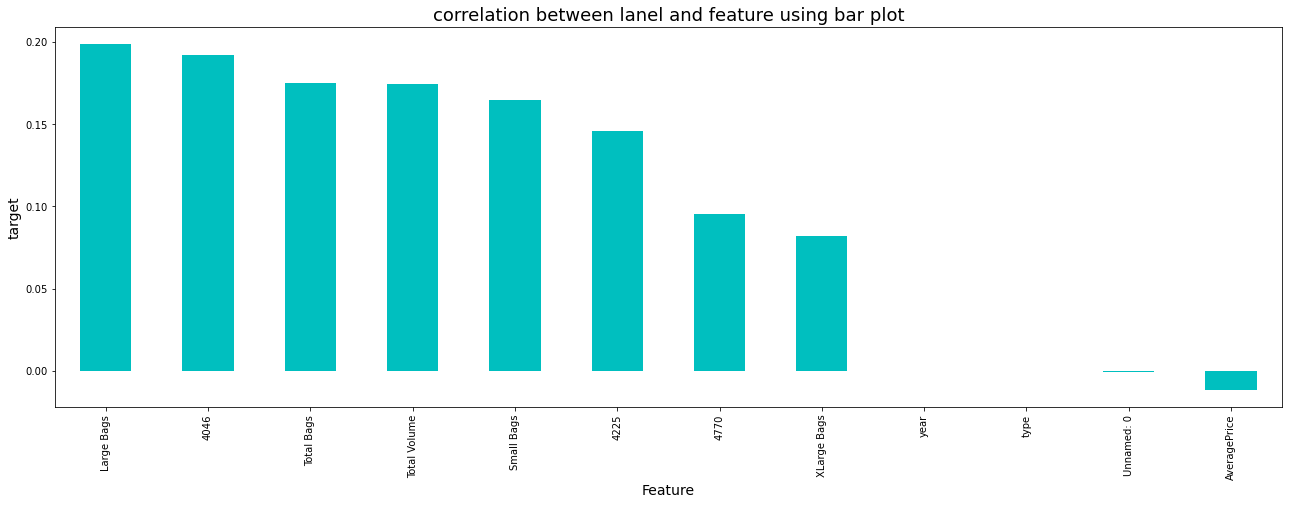

In [119]:
plt.figure(figsize=(22,7))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [120]:
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

In [121]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [123]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.036026e+00,Unnamed: 0
1,1.708597e+00,AveragePrice
2,4.919440e+09,Total Volume
3,6.600171e+08,4046
4,5.980301e+08,4225
5,4.763436e+06,4770
6,2.370316e+14,Total Bags
7,1.364727e+14,Small Bags
8,1.448103e+13,Large Bags
9,7.621400e+10,XLarge Bags


In [124]:
x.drop('Total Volume',inplace=True,axis=1)

In [125]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.034805e+00,Unnamed: 0
1,1.708413e+00,AveragePrice
2,1.006420e+01,4046
3,1.347443e+01,4225
4,5.378730e+00,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.621336e+10,XLarge Bags
9,1.686748e+00,type


In [126]:
x.drop('Total Bags',axis=True,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.034688,Unnamed: 0
1,1.708412,AveragePrice
2,10.061400,4046
3,13.472625,4225
4,5.378704,4770
5,19.342873,Small Bags
6,5.544875,Large Bags
7,3.414144,XLarge Bags
8,1.686706,type


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.799634703196347  on Random_state  184


In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [131]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)


predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.800365296803653
[[ 88   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0  97 ...   0   0   1]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1  97   0]
 [  0   2   1 ...   0   0  66]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.75      0.74      0.75       105
           2       0.91      0.90      0.90       108
           3       0.81      0.75      0.78       109
           4       0.78      0.84      0.81        95
           5       0.71      0.73      0.72       104
           6       0.96      0.95      0.95        99
           7       0.88      0.85      0.86       110
           8       0.91      0.94      0.92        93
           9       0.81      0.86      0.84       107
          10       0.67      0.73      0.70        98
          11       0.86      0.82      0.84       114
          12       0.88      0.79      0.84       116
          13       0.81      0.72

# Random Forest Classifier

In [132]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)


predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9084931506849315
[[101   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   1   2 ...   0   0  83]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       105
           1       0.86      0.89      0.87       105
           2       0.95      0.97      0.96       108
           3       0.93      0.80      0.86       109
           4       0.91      0.94      0.92        95
           5       0.86      0.84      0.85       104
           6       0.98      1.00      0.99        99
           7       0.92      0.87      0.90       110
           8       0.98      0.99      0.98        93
           9       0.93      0.93      0.93       107
          10       0.81      0.89      0.84        98
          11       0.97      0.96      0.96       114
          12       0.96      0.93      0.95       116
          13       0.89      0.8

# Logistic Regression

In [133]:
LR = LogisticRegression()
LR.fit(x_train,y_train)


predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.30575342465753425
[[26  0  0 ...  0  0  0]
 [ 9 21  0 ...  0  0  0]
 [ 1  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 95 13  0]
 [ 0  0  0 ...  2 70  0]
 [ 5  0  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.09      0.25      0.14       105
           1       0.60      0.20      0.30       105
           2       0.69      0.38      0.49       108
           3       0.24      0.25      0.25       109
           4       0.39      0.25      0.31        95
           5       0.60      0.03      0.06       104
           6       0.70      0.63      0.66        99
           7       0.35      0.29      0.32       110
           8       0.17      0.54      0.26        93
           9       0.38      0.46      0.41       107
          10       0.39      0.17      0.24        98
          11       0.34      0.43      0.38       114
          12       0.52      0.40      0.45       116
          13       0.21      0.36      0.26       106
          14 

# Support Vector Machine

In [134]:
svc = SVC()
svc.fit(x_train,y_train)


predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.24493150684931506
[[ 1  0  0 ...  0  0  0]
 [ 3  9  0 ...  0  0  4]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  2  0]
 [ 0  0  0 ...  0 61  0]
 [ 2  5  0 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       105
           1       0.31      0.09      0.13       105
           2       0.92      0.20      0.33       108
           3       0.00      0.00      0.00       109
           4       0.14      0.08      0.10        95
           5       0.07      0.15      0.10       104
           6       0.96      0.47      0.64        99
           7       0.36      0.07      0.12       110
           8       0.96      0.52      0.67        93
           9       0.76      0.15      0.25       107
          10       0.60      0.03      0.06        98
          11       0.41      0.44      0.42       114
          12       0.80      0.38      0.51       116
          13       0.87      0.31      0.46       106
          14 

# k nearest Neighbours

In [135]:
knn = KNN()
knn.fit(x_train,y_train)

predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.31141552511415527
[[ 33   3   8 ...   0   0   0]
 [  7  48   2 ...   0   0   0]
 [  1   2  49 ...   0   0   0]
 ...
 [  0   0   0 ... 107   0   0]
 [  0   2   0 ...   3  68   0]
 [  7   3   2 ...   0   0  39]]
              precision    recall  f1-score   support

           0       0.10      0.31      0.15       105
           1       0.18      0.46      0.26       105
           2       0.22      0.45      0.30       108
           3       0.13      0.26      0.17       109
           4       0.15      0.37      0.22        95
           5       0.11      0.22      0.15       104
           6       0.63      0.60      0.61        99
           7       0.13      0.20      0.16       110
           8       0.39      0.59      0.47        93
           9       0.20      0.31      0.24       107
          10       0.07      0.13      0.09        98
          11       0.29      0.42      0.34       114
          12       0.48      0.52      0.50       116
          13       0.36      0.

# cross validation score:

In [136]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,x,y,cv=5).mean())
print(cross_val_score(RFC,x,y,cv=5).mean())
print(cross_val_score(LR,x,y,cv=5).mean())
print(cross_val_score(svc,x,y,cv=5).mean())
print(cross_val_score(knn,x,y,cv=5).mean())

0.538541826058556
0.6764096900257905
0.25781370013176813
0.20756560814184408
0.1884423805358571


# HYPERPARAMETER TUNING

In [137]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [138]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'log2', 'n_estimators': 150}


In [139]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.64840182648402


# SAVE THE MODEL

In [140]:
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# PREDICTION ON SAVED MODEL

In [141]:
model=joblib.load("Avacado_region.pkl")

prediction = model.predict(x_test)
prediction

array([46,  7, 14, ..., 26,  3,  2])

# ROC- AUC curve:

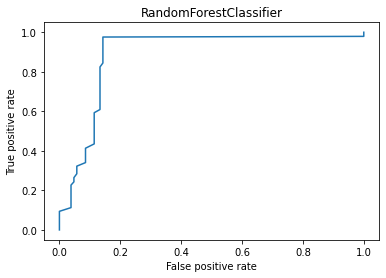

In [142]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [143]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,46,46
1,7,7
2,14,14
3,1,1
4,22,22
...,...,...
5470,2,8
5471,1,48
5472,26,26
5473,3,3


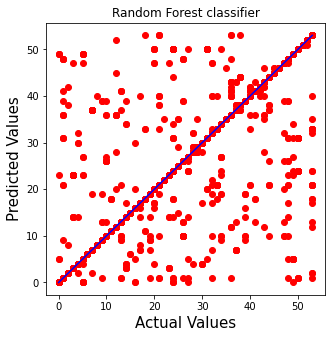

In [144]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

# Thank You